# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [9]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att0'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

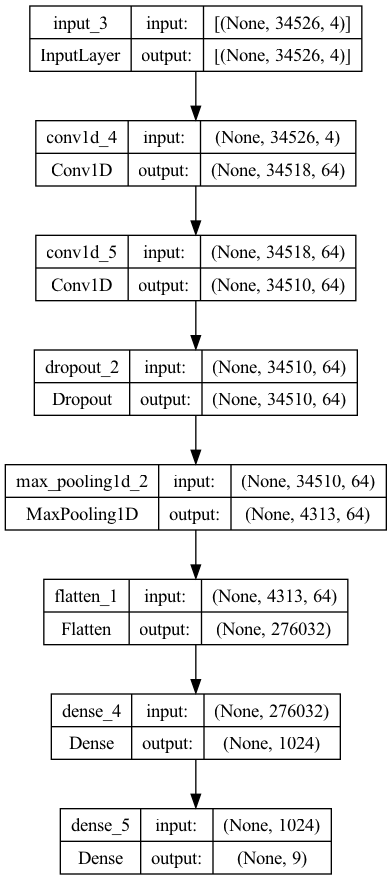

In [10]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [11]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d_4 (Conv1D)           (None, 34518, 64)         2304      
                                                                 
 conv1d_5 (Conv1D)           (None, 34510, 64)         36864     
                                                                 
 dropout_2 (Dropout)         (None, 34510, 64)         0         
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 4313, 64)          0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 276032)            0         
                                                           

In [12]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/15
311/311 [==============================] - 2342s 7s/step - loss: 2.4625 - ERM: 0.3209 - KDEL: 0.3371 - LMA: 0.0528 - MITO: 0.1688 - NES: 0.1096 - NIK: 0.1607 - NLS: 0.1044 - NUCP: 0.1858 - OMM: 0.0734 - val_loss: 2.1656 - val_ERM: 0.1353 - val_KDEL: 0.3030 - val_LMA: 0.1009 - val_MITO: 0.2956 - val_NES: 0.0449 - val_NIK: 0.2040 - val_NLS: 0.0639 - val_NUCP: 0.1240 - val_OMM: -0.1669
Epoch 2/15
311/311 [==============================] - 2230s 7s/step - loss: 2.1579 - ERM: 0.4220 - KDEL: 0.4067 - LMA: 0.2254 - MITO: 0.2237 - NES: 0.2580 - NIK: 0.2902 - NLS: 0.2282 - NUCP: 0.2883 - OMM: 0.1984 - val_loss: 2.1655 - val_ERM: 0.1035 - val_KDEL: 0.2982 - val_LMA: 0.0766 - val_MITO: 0.2530 - val_NES: 0.1094 - val_NIK: 0.3168 - val_NLS: 0.0826 - val_NUCP: 0.2080 - val_OMM: -0.0744
Epoch 3/15
311/311 [==============================] - 2136s 7s/step - loss: 2.1359 - ERM: 0.5842 - KDEL: 0.5004 - LMA: 0.4287 - MITO: 0.3520 - NES: 0.4550 - NIK: 0.4586 - NLS: 0.4080 - NUCP: 0.4469 - OMM: 0

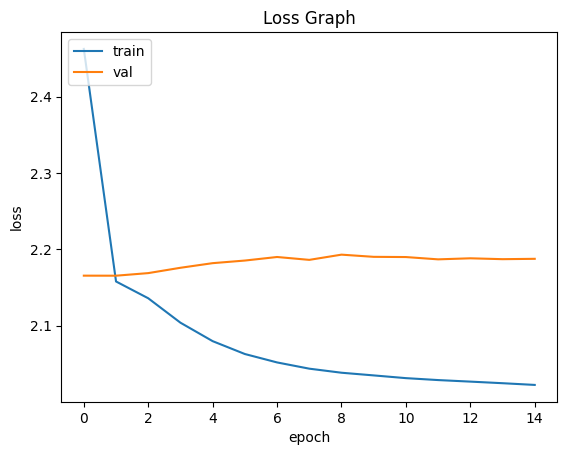

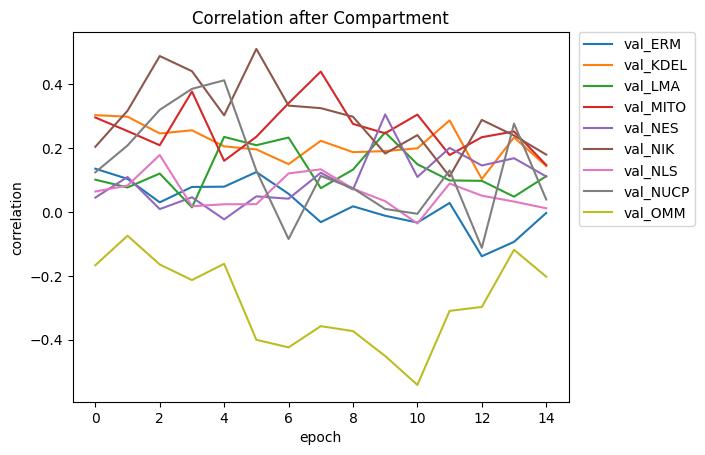

In [14]:
import matplotlib.pyplot as plt
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

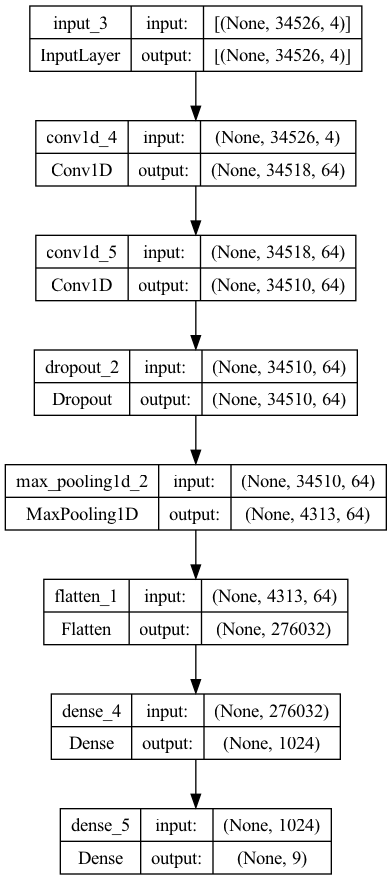

In [15]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)